<a href="https://colab.research.google.com/github/HongjinZhu/Animal-Rescue-Ranger-Response-Prediction/blob/main/clustering_pattern_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('Urban_Park_Ranger_Animal_Condition_Response_20240702.csv')
df

# Clustering and Pattern Detection

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

df['Date and Time of initial call'] = pd.to_datetime(df['Date and Time of initial call'])

df['Hour'] = df['Date and Time of initial call'].dt.hour
df['DayOfWeek'] = df['Date and Time of initial call'].dt.dayofweek
df['Month'] = df['Date and Time of initial call'].dt.month

# features for clustering
features = ['Hour', 'DayOfWeek', 'Month', 'Borough', 'Property', 'Location', 'Species Description', 'Call Source']

# row-wise dropping missing values in selected features
df = df.dropna(subset=features)

column_transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Hour', 'DayOfWeek', 'Month']),
    ('cat', OneHotEncoder(), ['Borough', 'Property', 'Location', 'Species Description', 'Call Source'])
])

# apply column transformer
X = column_transformer.fit_transform(df[features])

<ipython-input-4-6e4f56758dbb>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date and Time of initial call'] = pd.to_datetime(df['Date and Time of initial call'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


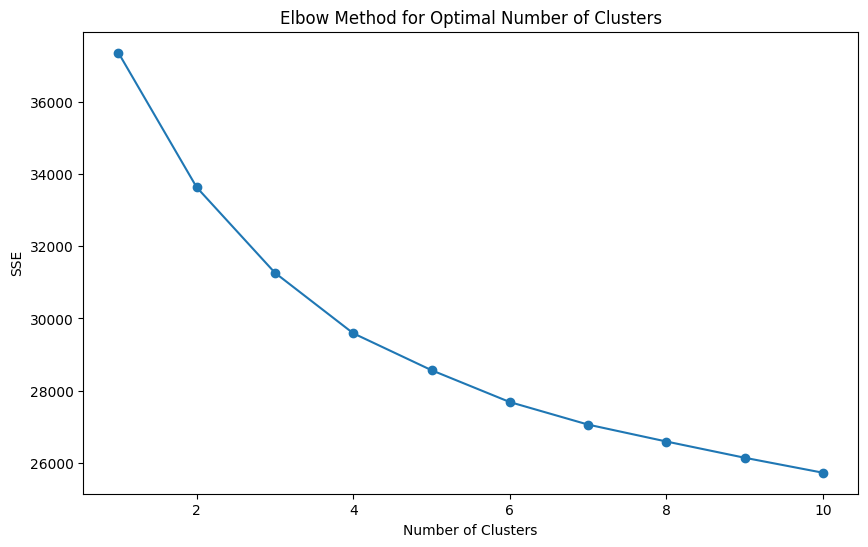

In [ ]:
# optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11, 1), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

<ipython-input-6-e6b05f35d305>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X)


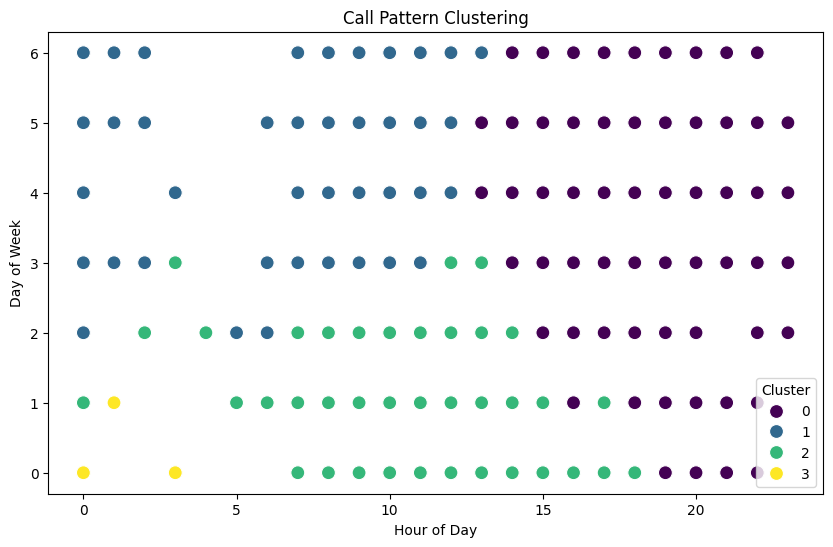

In [ ]:
# k-means with optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hour', y='DayOfWeek', hue='Cluster', palette='viridis', s=100)
plt.title('Call Pattern Clustering')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# analyze clusters
cluster_analysis = df.groupby('Cluster').size().reset_index(name='Count')
print(cluster_analysis)

for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}")
    print(df[df['Cluster'] == cluster][['Borough', 'Property', 'Location', 'Species Description', 'Call Source']].describe())

   Cluster  Count
0        0   1169
1        1   1260
2        2   1271
3        3   1324
Cluster 0
          Borough      Property     Location Species Description Call Source
count        1169          1169         1169                1169        1169
unique          5           241         1062                 165           8
top     Manhattan  Central Park  Harlem Meer             Raccoon      Public
freq          349           205            9                 211         409
Cluster 1
          Borough      Property    Location Species Description Call Source
count        1260          1260        1260                1260        1260
unique          5           269        1156                 170           7
top     Manhattan  Central Park  Playground             Raccoon    Employee
freq          371           222           8                 320         377
Cluster 2
          Borough      Property      Location Species Description Call Source
count        1271          1271      